In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
import pandas as pd
import scipy.stats as ss
import seaborn as sns

z_thresh = 4
n_baseline_frames = 5

In [98]:
def compute_single_baseline(cell_trace,n_baseline_frames):

    nfreq = list(cell_trace.keys())
    nInt = list(cell_trace[nfreq[0]].keys())
    nrep = list(cell_trace[nfreq[0]][nInt[0]].keys())

    trials = (np.array([[[cell_trace[i][j][k] for k in nrep] for j in nInt] for i in nfreq]))
    baselines = trials[:,:,:,:n_baseline_frames]
    
    return baselines

In [99]:
def get_zscored_response(trial,baselines,n_baseline_frames):
    response = trial[n_baseline_frames:]

    baseline_mean = np.average(baselines)
    baseline_std = np.std(baselines)

    zscorer = lambda x: (x-baseline_mean)/baseline_std
    zscore_response = np.array([zscorer(xi) for xi in response])

    return zscore_response

In [100]:
psilo_1_435 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID435/psilo/TSeries-08072023-1534-118/suite2p/plane0/cells.pkl"
psilo_2_435 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID435/psilo/TSeries-08072023-1534-119/suite2p/plane0/cells.pkl"

psilo_1_436 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID436/psilo/TSeries-08072023-1534-120/suite2p/plane0/cells.pkl"
psilo_2_436 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID436/psilo/TSeries-08072023-1534-122/suite2p/plane0/cells.pkl"

psilo_1_437 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID437/psilo_29092023/TSeries-01142009-2331-130/suite2p/plane0/cells.pkl"
psilo_2_437 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID437/psilo_29092023/TSeries-01142009-2331-131/suite2p/plane0/cells.pkl"

psilo_1_439 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID439/psilo_29092023/TSeries-01142009-2331-132/suite2p/plane0/cells.pkl"
psilo_2_439 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID439/psilo_29092023/TSeries-01142009-2331-133/suite2p/plane0/cells.pkl"

psilo_1_488 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID488/psilo/TSeries-10132023-1324-149/suite2p/plane0/cells.pkl"
psilo_2_488 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID488/psilo/TSeries-10132023-1324-150/suite2p/plane0/cells.pkl"

psilo_1_489 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID489/psilo/TSeries-10132023-1324-151/suite2p/plane0/cells.pkl"
psilo_2_489 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID489/psilo/TSeries-10132023-1324-152/suite2p/plane0/cells.pkl"

all_dicts_psilo_1 = [psilo_1_435,psilo_1_436,psilo_1_437,psilo_1_439,psilo_1_488,psilo_1_489]
all_dicts_psilo_2 = [psilo_2_435,psilo_2_436,psilo_2_437,psilo_2_439,psilo_2_488,psilo_2_489]
all_dicts_psilo_1_str = ["psilo_1_435","psilo_1_436","psilo_1_437","psilo_1_439","psilo_1_488","psilo_1_489"]
all_dicts_psilo_2_str = ["psilo_2_435","psilo_2_436","psilo_2_437","psilo_2_439","psilo_2_488","psilo_2_489"]
psilo_dict_1 = {}
psilo_dict_2 = {}

for file in all_dicts_psilo_1_str:
    psilo_dict_1[file]=None

for file in all_dicts_psilo_2_str:
    psilo_dict_2[file] = None

zippedpsilo_1 = zip(all_dicts_psilo_1, all_dicts_psilo_1_str)
for k,v in zippedpsilo_1:
    with open(k,'rb') as f:
        psilo_dict_1[v] = pickle.load(f)

zippedpsilo_2 = zip(all_dicts_psilo_2, all_dicts_psilo_2_str)
for k,v in zippedpsilo_2:
    with open(k,'rb') as f:
        psilo_dict_2[v] = pickle.load(f)

In [101]:
cell_list_1 = list(psilo_dict_1[all_dicts_psilo_1_str[0]].keys())
dict_keys = list(psilo_dict_1.keys())

nfreq = list(psilo_dict_1[all_dicts_psilo_1_str[0]][cell_list_1[0]]['traces'].keys())
nInt = list(psilo_dict_1[all_dicts_psilo_1_str[0]][cell_list_1[0]]['traces'][nfreq[0]].keys())
ntrial = list(psilo_dict_1[all_dicts_psilo_1_str[0]][cell_list_1[0]]['traces'][nfreq[5]][nInt[0]].keys())
# nfreq.insert(0, 12)
print(nfreq, nInt, ntrial)
print(dict_keys)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [65] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 2

In [102]:
# This script goes through all the cells in the big saline dictionary, and identified the ones that have a significant response to the familiar stim within the first three trials.
# It then creates an extra dictionary sub-field as a key for that cell, entitled 'active_early', which contains a True or False Boollean.  

trials = [1, 2, 3]

for dict_key in psilo_dict_1:
    cell_list = list(psilo_dict_1[dict_key].keys())
    
    for cell_key in cell_list:
        first_three_zscore = []
        baselines = compute_single_baseline(psilo_dict_1[dict_key][cell_key]['traces'], n_baseline_frames)
        
        # Flag to indicate whether 'active_early' has been set to True
        active_early_set = False
        
        for trial in trials:
            zscore = get_zscored_response(psilo_dict_1[dict_key][cell_key]['traces'][12335][65][trial], baselines, n_baseline_frames)
            first_three_zscore.append(zscore)
            
        first_three_zscore = np.array(first_three_zscore)
        
        for i in range(first_three_zscore.shape[0]):
            stim_period = first_three_zscore[i, 4:]
            peak_response = np.max(stim_period)
            
            if peak_response >= z_thresh:
                psilo_dict_1[dict_key][cell_key]['active_early'] = True
                active_early_set = True
                break  # Break out of the inner loop if 'active_early' is set to True
        
        # If 'active_early' is not set to True, label it as False
        if not active_early_set:
            psilo_dict_1[dict_key][cell_key]['active_early'] = False

In [103]:
# I need to iterate through the big dictionary and if a cell's 'active_early' is True, take the mean peak response for the first ten trials, and trials 11-20. 

trials_early = [1,2,3,4,5,6,7,8,9,10]
trials_late = [11,12,13,14,15,16,17,18,19,20]
median_trials_early = []
mean_trials_early = []
mean_trials_late = []
median_trials_late = []


for dict in psilo_dict_1:
    cell_list = list(psilo_dict_1[dict].keys())

    for cell in cell_list:
        if psilo_dict_1[dict][cell]['active_early'] == True:
            trials_list_early = []
            trials_list_late = []

            baselines = compute_single_baseline(psilo_dict_1[dict][cell]['traces'], n_baseline_frames)

            for trial in trials_early:
                trials_list_early.append(get_zscored_response(psilo_dict_1[dict][cell]['traces'][12335][65][trial], baselines, n_baseline_frames))
            trials_list_early = np.array(trials_list_early)
            trials_list_early = np.max(trials_list_early,axis=1)
            median_trials_early.append(np.median(trials_list_early))
            mean_trials_early.append(np.mean(trials_list_early))

            for trial in trials_late:
                trials_list_late.append(get_zscored_response(psilo_dict_1[dict][cell]['traces'][12335][65][trial], baselines, n_baseline_frames))
            trials_list_late = np.array(trials_list_late)
            trials_list_late = np.max(trials_list_late,axis=1)
            median_trials_late.append(np.median(trials_list_late))
            mean_trials_late.append(np.mean(trials_list_late))
            

print(median_trials_late)             

[1.72131934354696, 5.3278659940794775, 1.3832703329557465, 1.972886403259081, 3.962385556899668, 0.6242471331798224, 1.4080055019806115, 0.6553340873461904, 1.808137347021392, 1.3549406092314442, 1.624082125866384, 8.821683579342189, 2.8548220271366924, 2.7443019709332197, 1.356696364633701, 1.5965813514461265, 2.8581101296748823, 0.40965188271509245, 2.1376738513074924, 2.372769082449155, 4.015500561985385, 1.374809562259948, -0.08168015768098785, 1.1097285760178313, 0.4199159910003807, 4.725616475874562, 0.41434744078868824, 1.271252000545195, 0.4076029489816804, 5.1394215509422505, 4.3782423434948505, 1.9676804829407781, 0.43212050246204325, 0.7730571682878637, 1.743195937571834, 1.364816013380406, 0.7476204644654281, 1.2043696182428527, 0.7389922250075674, 1.402197558861068, 2.6323928046595215, 1.5467401057353949, 1.7019015101843737, 0.6353735615714795, 0.6440139999971427, 0.6060097096473158, 0.3171780787669166, 2.188985574716844, 1.624359173466645, 1.3354380354186415, 0.5709903086

In [104]:
df_median_trials_1 = pd.DataFrame(columns=['Early','Late'])

pre = pd.DataFrame(mean_trials_early)
post = pd.DataFrame(mean_trials_late)

df_median_trials_1['Early'] = pre
df_median_trials_1['Late'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


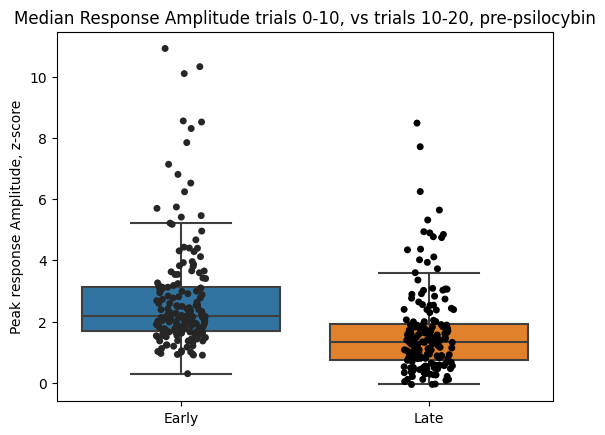

In [105]:
ax = sns.boxplot(data=df_median_trials_1,showfliers=False),
sns.stripplot(data=df_median_trials_1,color='black')
plt.ylabel("Peak response Amplitude, z-score")
plt.title("Median Response Amplitude trials 0-10, vs trials 10-20, pre-psilocybin")
# plt.ylim(0, 35)

plt.show()

In [106]:
# This script goes through all the cells in the big saline dictionary, and identified the ones that have a significant response to the familiar stim within the first three trials.
# It then creates an extra dictionary sub-field as a key for that cell, entitled 'active_early', which contains a True or False Boollean.  

trials = [1, 2, 3]

for dict_key in psilo_dict_2:
    cell_list = list(psilo_dict_2[dict_key].keys())
    
    for cell_key in cell_list:
        first_three_zscore = []
        baselines = compute_single_baseline(psilo_dict_2[dict_key][cell_key]['traces'], n_baseline_frames)
        
        # Flag to indicate whether 'active_early' has been set to True
        active_early_set = False
        
        for trial in trials:
            zscore = get_zscored_response(psilo_dict_2[dict_key][cell_key]['traces'][12335][65][trial], baselines, n_baseline_frames)
            first_three_zscore.append(zscore)
            
        first_three_zscore = np.array(first_three_zscore)
        
        for i in range(first_three_zscore.shape[0]):
            stim_period = first_three_zscore[i, 4:]
            peak_response = np.max(stim_period)
            
            if peak_response >= z_thresh:
                psilo_dict_2[dict_key][cell_key]['active_early'] = True
                active_early_set = True
                break  # Break out of the inner loop if 'active_early' is set to True
        
        # If 'active_early' is not set to True, label it as False
        if not active_early_set:
            psilo_dict_2[dict_key][cell_key]['active_early'] = False

In [107]:
trials_early = [1,2,3,4,5,6,7,8,9,10]
trials_late = [11,12,13,14,15,16,17,18,19,20]
median_trials_early_2 = []
mean_trials_early_2 = []
mean_trials_late_2 = []
median_trials_late_2 = []


for dict in psilo_dict_2:
    cell_list = list(psilo_dict_2[dict].keys())

    for cell in cell_list:
        if psilo_dict_2[dict][cell]['active_early'] == True:
            trials_list_early = []
            trials_list_late = []

            baselines = compute_single_baseline(psilo_dict_2[dict][cell]['traces'], n_baseline_frames)

            for trial in trials_early:
                trials_list_early.append(get_zscored_response(psilo_dict_2[dict][cell]['traces'][12335][65][trial], baselines, n_baseline_frames))
            trials_list_early = np.array(trials_list_early)
            trials_list_early = np.max(trials_list_early,axis=1)
            median_trials_early_2.append(np.median(trials_list_early))
            mean_trials_early_2.append(np.mean(trials_list_early))

            for trial in trials_late:
                trials_list_late.append(get_zscored_response(psilo_dict_2[dict][cell]['traces'][12335][65][trial], baselines, n_baseline_frames))
            trials_list_late = np.array(trials_list_late)
            trials_list_late = np.max(trials_list_late,axis=1)
            median_trials_late_2.append(np.median(trials_list_late))
            mean_trials_late_2.append(np.mean(trials_list_late))
            

print(median_trials_late_2)    

[0.40055635280850854, 2.035423802005173, 0.9852506687977687, 1.147197163812132, 0.5376294337150096, 1.0795035312492813, 0.8069181874911763, 1.6332884199619748, 1.551067978043143, 1.546912583461842, 0.33356086357084813, 0.6466745085383753, 2.461663122840103, 0.17284869748483533, 0.42535855504276404, 1.579063123418043, 2.2589078302661925, 0.4919503353180514, 1.0526597766136732, 3.4831247391719655, 0.7665115025697461, 3.5784771824505395, 1.7556371405662752, 4.3312109683499465, 1.39125596340426, 1.3754607861135395, 2.31873564377723, 1.1012008275183298, 0.5100450636754587, 1.5044813084630042, 1.8392405938165584, 1.9152083652662135, 0.8227417666690091, 1.9542989264128128, 4.022024073489583, 3.5354165213390276, 6.92712943133217, 1.5451606514799818, 0.46758458518318213, 1.9252663295906585, 1.2366926021884415, 1.3158962494794735, 1.1299564776237636, 1.1202732076488688, 1.024476017498947, 1.9447377800544081, 1.081747847007541, 1.1361989399166734, 0.6210425326341588, 0.86130043152686, 1.139366977

In [108]:
df_median_trials_2 = pd.DataFrame(columns=['Early','Late'])

pre = pd.DataFrame(mean_trials_early_2)
post = pd.DataFrame(mean_trials_late_2)

df_median_trials_2['Early'] = pre
df_median_trials_2['Late'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


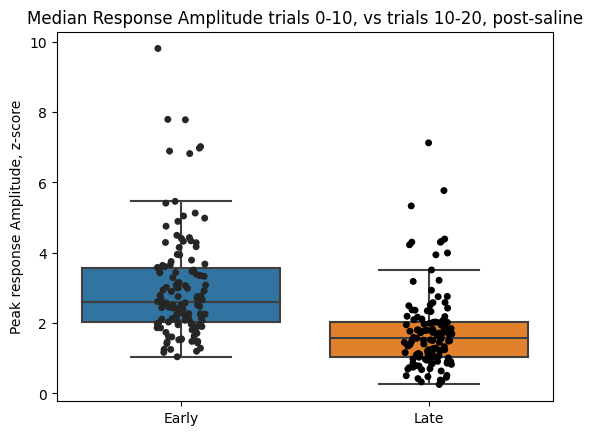

In [109]:
ax = sns.boxplot(data=df_median_trials_2,showfliers=False),
sns.stripplot(data=df_median_trials_2,color='black')
plt.ylabel("Peak response Amplitude, z-score")
plt.title("Median Response Amplitude trials 0-10, vs trials 10-20, post-saline")
# plt.ylim(0, 35)

plt.show()

In [110]:
#  Calculate the difference between the two, for each condition.


differences_pre = [y - x for x, y in zip(median_trials_early, median_trials_late)]
differences_post = [y - x for x, y in zip(median_trials_early_2, median_trials_late_2)]




In [111]:
df_differences = pd.DataFrame(columns=['Pre-psilocybin','Post-psilocybin'])

pre = pd.DataFrame(differences_pre)
post = pd.DataFrame(differences_post)

df_differences['Pre-psilocybin'] = pre
df_differences['Post-psilocybin'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


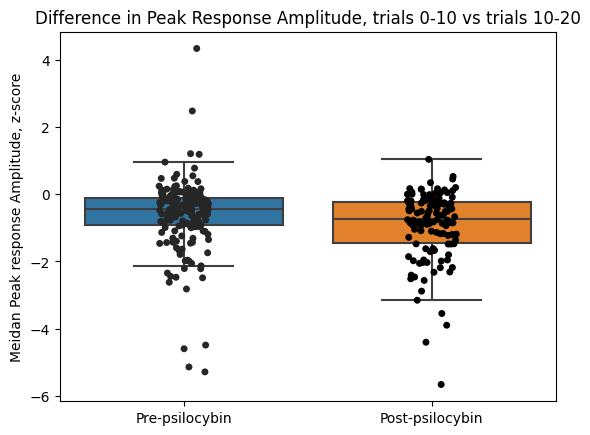

In [112]:
ax = sns.boxplot(data=df_differences,showfliers=False),
sns.stripplot(data=df_differences,color='black')
plt.ylabel("Meidan Peak response Amplitude, z-score")
plt.title("Difference in Peak Response Amplitude, trials 0-10 vs trials 10-20")
# plt.ylim(0, 35)

plt.show()

In [113]:
ss.ttest_ind(differences_pre,differences_post)

Ttest_indResult(statistic=2.3517573597731403, pvalue=0.01934017931776155)